In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import pickle
import matplotlib.pyplot as plt
import numpy as np
import re
import copy

In [35]:
history = []
inputs = [['v1_9/5_epoch', '512-512 fc layers'], 
          ['v1_10/10_epoch', '512-1024-512 fc layers'], 
          ['v1_11/10_epoch', '512-1024-2048-1024-512 fc layers']]
for inp in inputs:
    el = {}
    el['name'] = inp[0]
    el['description'] = inp[1]
    pickle_input = open(el['name'] + '_history.pkl', 'rb')
    el['history'] = pickle.load(pickle_input)
    history.append(el)

In [34]:
history

[{'history': {'actual_accuracy': [0.24794161676646706,
    0.49499438622754494,
    0.63313997005988021,
    0.69461077844311381,
    0.72838697604790414,
    0.7512163173652695,
    0.76716878742514971,
    0.78171781437125754,
    0.78990456586826352,
    0.80136601796407181,
    0.81296781437125754,
    0.81610217065868262,
    0.82382110778443118,
    0.83107223053892221,
    0.83598428143712578,
    0.84056886227544914,
    0.84608907185628746,
    0.84819423652694614,
    0.85731661676646709,
    0.85688219332456295,
    0.8605913173652695,
    0.86765531437125754,
    0.8730819610778443,
    0.8769180389221557,
    0.87696482035928147,
    0.88154940119760483,
    0.88304640718562877,
    0.88613398203592819,
    0.88884730538922152,
    0.88964258982035926,
    0.89539670658682635,
    0.8998409431137725,
    0.89726796407185627,
    0.89970059880239517,
    0.9048465568862275,
    0.89956025449101795,
    0.90625,
    0.90975860778443118,
    0.91177020958083832,
    0.9098905

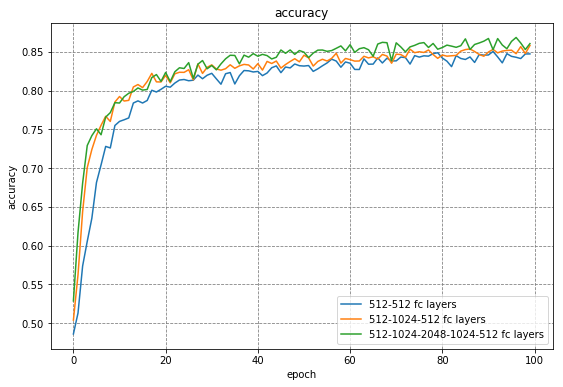

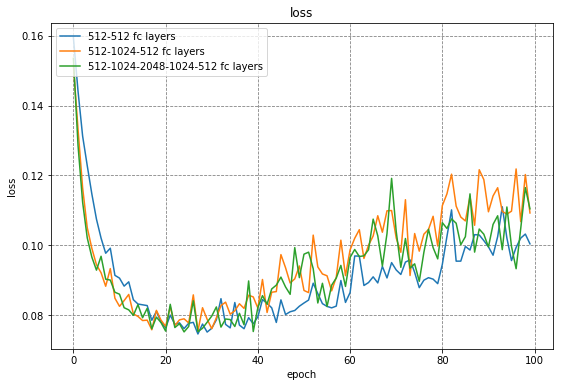

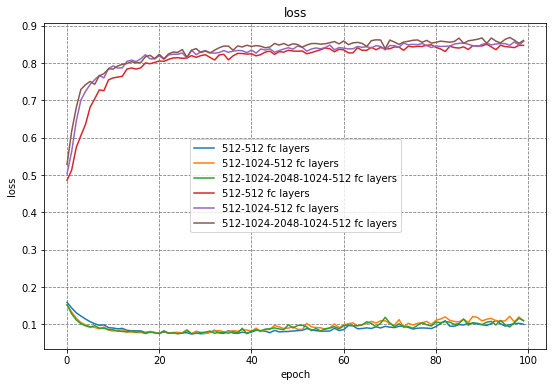

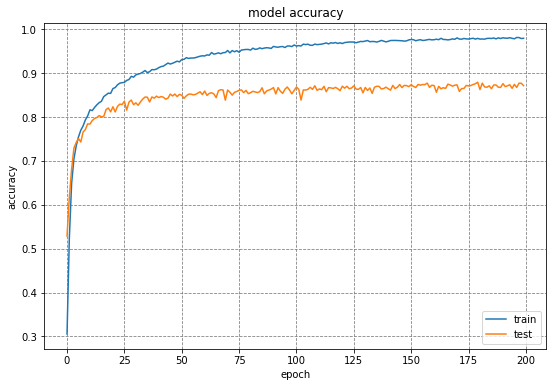

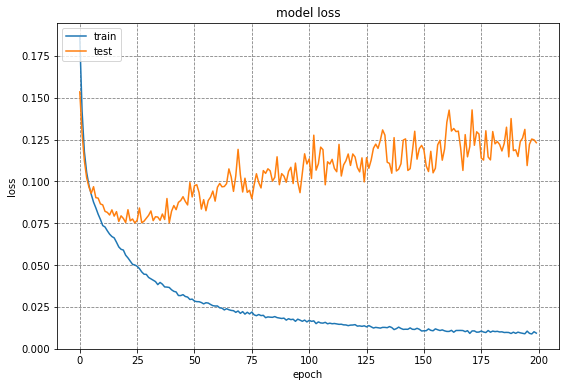

In [59]:
# plt.rcParams["figure.figsize"] = fig_size
# plt.rcParams["figure.figsize"] = [12.0, 8.0]
plt.rcParams["figure.figsize"] = [9.0, 6.0]
# plt.rcParams["figure.figsize"] = [6.0, 4.0]
for res in history:
    plt.plot(res['history']['val_actual_accuracy'][:100])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
legend = []
for res in history:
    legend.append(res['description'])
plt.legend(legend, loc='lower right')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
# # major ticks every 20, minor ticks every 5                                      
# major_ticks = np.arange(0, 101, 20)                                              
# minor_ticks = np.arange(0, 101, 5)                                               

# ax.set_xticks(major_ticks)                                                       
# ax.set_xticks(minor_ticks, minor=True)                                           
# ax.set_yticks(major_ticks)                                                       
# ax.set_yticks(minor_ticks, minor=True)                                           

# # and a corresponding grid                                                       

# ax.grid(which='minor', alpha=0.2)                                                
# ax.grid(which='major', alpha=0.5)


# fig_size = plt.rcParams["figure.figsize"]


plt.show()

# summarize history for loss
for res in history:
    plt.plot(res['history']['val_loss'][:100])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for res in history:
    legend.append(res['description'])
plt.legend(legend, loc='upper left')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

# summarize history for loss and accuracy
for res in history:
    plt.plot(res['history']['val_loss'][:100])
for res in history:
    plt.plot(res['history']['val_actual_accuracy'][:100])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for res in history:
    legend.append(res['description'])
plt.legend(legend, loc='center')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()


# graphs only per model
plt.plot(res['history']['actual_accuracy'])
plt.plot(res['history']['val_actual_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
# summarize history for loss
plt.plot(res['history']['loss'])
plt.plot(res['history']['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# draws gray dashed lines below
ax = plt.subplot(111)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [17]:
import sys
sys.path.insert(0, '../../../')
from prepare_data import *
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
old_feature_dictionary = create_feature_dictionary(content)

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!


In [3]:
#  create feature dictionary
def create_feature_dictionary(content):
    additional_data = [el[2] for el in content]
    possible_variants = sorted(set(additional_data))
    categories = sorted(set([el[0] for el in possible_variants]))

    feature_dictionary = []
    for category in categories:
        category_features = [1, category]
        examples_per_category = [el for el in possible_variants if el[0] == category]
        longest_element = max(examples_per_category, key=len)
        for i in range(1, len(longest_element)):
            possibilities_per_el = sorted(set([el[i] for el in examples_per_category if i < len(el)]))
            category_features[0] += len(possibilities_per_el)
            category_features.append(possibilities_per_el)
        feature_dictionary.append(category_features)
    return feature_dictionary


def create_X_features(content, feature_dictionary):
    content = content
    X_other_features = []
    i = 0
    for el in content:
#         if i % 1000 == 0:
#             print(str(i) + '/' + str(len(content)))
#         i += 1
#         print(str(i) + '/' + str(len(content)))
        X_el_other_features = []
        converted_el = ''.join(convert_to_MULTEXT_east_v4(list(el[2]), feature_dictionary))
#         converted_el = el[2]
        for feature in feature_dictionary:
            if converted_el[0] == feature[1]:
                X_el_other_features.append(1)
                for i in range(2, len(feature)):
                    for j in range(len(feature[i])):
                        if i-1 < len(converted_el) and feature[i][j] == converted_el[i-1]:
                            X_el_other_features.append(1)
                        else:
                            X_el_other_features.append(0)
            else:
                X_el_other_features.extend([0] * feature[0])
        X_other_features.append(X_el_other_features)
    return np.array(X_other_features)


def convert_to_MULTEXT_east_v4(old_features, feature_dictionary):
    new_features = ['-'] * 9
    new_features[:len(old_features)] = old_features
    if old_features[0] == 'A':
        if old_features[1] == 'f' or old_features[1] == 'o':
            new_features[1] = 'g'
        return new_features[:len(feature_dictionary[0])-1]
    if old_features[0] == 'C':
        return new_features[:len(feature_dictionary[1])-1]
    if old_features[0] == 'I':
        return new_features[:len(feature_dictionary[2])-1]
    if old_features[0] == 'M':
        new_features[2:6] = old_features[1:5]
        new_features[1] = old_features[5]
        if new_features[2] == 'm':
            new_features[2] = '-'
        return new_features[:len(feature_dictionary[3])-1]
    if old_features[0] == 'N':
        if len(old_features) > 5:
            new_features[5] = old_features[7]
        return new_features[:len(feature_dictionary[4])-1]
    if old_features[0] == 'P':
        if new_features[8] == 'n':
            new_features[8] = 'b'
        return new_features[:len(feature_dictionary[5])-1]
    if old_features[0] == 'Q':
        return new_features[:len(feature_dictionary[6])-1]
    if old_features[0] == 'R':
        return new_features[:len(feature_dictionary[7])-1]
    if old_features[0] == 'S':
        if len(old_features) == 4:
            new_features[1] = old_features[3]
        else:
            new_features[1] = '-'
        return new_features[:len(feature_dictionary[8])-1]
    if old_features[0] == 'V':
        if old_features[1] == 'o' or old_features[1] == 'c':
            new_features[1] = 'm'
        new_features[3] = old_features[2]
        new_features[2] = '-'
        if old_features[2] == 'i':
            new_features[3] = 'r'
        if len(old_features) > 3 and old_features[3] == 'p':
            new_features[3] = 'r'
        elif len(old_features) > 3 and old_features[3] == 'f':
            new_features[3] = 'f'
        if len(old_features) >= 9:
            new_features[7] = old_features[8]
        else:
            new_features[7] = '-'
        return new_features[:len(feature_dictionary[9])-1]
        
        
    
    return ''
#     print(features[0])

In [4]:
X_other_features = create_X_features(content, feature_dictionary)

NameError: name 'feature_dictionary' is not defined

In [4]:
def filtered_feature_dict():
    # old: http://nl.ijs.si/ME/Vault/V3/msd/html/
    # new: http://nl.ijs.si/ME/V4/msd/html/
    # changes: http://nl.ijs.si/jos/msd/html-en/msd.diffs.html

    return [[21,
  'A',
  ['g', 's'],
  ['p', 'c', 's'],
  ['m', 'f', 'n'],
  ['s', 'd', 'p'],
  ['n', 'g', 'd', 'a', 'l', 'i'],
  ['-', 'n', 'y']],
 [3, 'C', ['c', 's']],
 [1, 'I'],
 [21,
  'M',
  ['l'],
  ['-', 'c', 'o', 's'],
  ['m', 'f', 'n'],
  ['s', 'd', 'p'],
  ['n', 'g', 'd', 'a', 'l', 'i'],
  ['-', 'n', 'y']],
 [17,
  'N',
  ['c'],
  ['m', 'f', 'n'],
  ['s', 'd', 'p'],
  ['n', 'g', 'd', 'a', 'l', 'i'],
  ['-', 'n', 'y']],
 [40,
  'P',
  ['p', 's', 'd', 'r', 'x', 'g', 'q', 'i', 'z'],
  ['-', '1', '2', '3'],
  ['-', 'm', 'f', 'n'],
  ['-', 's', 'd', 'p'],
  ['-', 'n', 'g', 'd', 'a', 'l', 'i'],
  ['-', 's', 'd', 'p'],
  ['-', 'm', 'f', 'n'],
  ['-', 'y', 'b']],
 [1, 'Q'],
 [5, 'R', ['g'], ['p', 'c', 's']],
 [7, 'S', ['-', 'g', 'd', 'a', 'l', 'i']],
 [24,
  'V',
  ['m'],
  ['-'],
  ['n', 'u', 'p', 'r', 'f', 'c'],
  ['-', '1', '2', '3'],
  ['-', 's', 'p', 'd'],
  ['-', 'm', 'f', 'n'],
  ['-', 'n', 'y']]
]
%run ../../../prepare_data.py
# X_other_features = create_X_features(content, feature_dictionary)
feature_dictionary = create_feature_dictionary()
# case = 3107
# print(content[case])
# print(feature_dictionary)
# X_other_features = create_X_features([content[case]], feature_dictionary)
X_other_features = create_X_features(content, feature_dictionary)
# print(X_other_features)
# print(decode_X_features(feature_dictionary, X_other_features))
X_other_features = np.array(X_other_features)
X_other_features.shape
case_numbers = np.sum(X_other_features, axis=0)

# dict_occurances_in_dataset_rate(content)

HERE!!!
HERE!!!
HERE!!!
HERE!!!
[294779 278449  16330 250008  22385  22386 106240  94267  94272 106246
  94266  94267  50506  47134  47134  55737  47134  47134 281176   6767
   6836     39     21     18      8   8700   8700    114   2090   5995
    501   2988   2856   2856   2310   2178   4212   1416   1437   1437
   1536   1437   1437   8668     22     10 113318 113318  44731  45410
  23177  38739  37184  37395  18879  18888  18878  18879  18899  18895
 110785   1657    876   3649    156    605    684    147     66    263
    178   1425    125   2888    194    194    373    193   1186   1136
   1134    135   1191   1195   1128     25    591    598    596    672
    585    582   3044    275    165    165   3484     55     55     55
   3482     56    111     76   7128   7128   6253    437    438    124
     45     44      7     14      6      8 108610 108610 108610   3620
   3611  48798  52570     10      1  56030  18716  22401  11463   7232
  31297  35099  34982  59812  16266  16266  1

In [28]:
%run ../../../prepare_data.py
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
print(len(dictionary))
print(dictionary)

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!
30
['', '-', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', 'č', 'š', 'ž']


In [27]:
with open("../../../data/SlovarIJS_BESEDE_utf8_old.lex", "rt") as fin:
    with open("../../../data/SlovarIJS_BESEDE_utf8.lex", "wt") as fout:
        for line in fin:
            fout.write(line.replace('è', 'č'))